In [4]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

In [5]:
import urllib.request
url = "https://api.covid19api.com/summary"
response = urllib.request.urlopen(url)
raw_json = response.read().decode()
print(raw_json)

{"Message":"","Global":{"NewConfirmed":587360,"TotalConfirmed":53312993,"NewDeaths":8374,"TotalDeaths":1301948,"NewRecovered":253079,"TotalRecovered":34395271},"Countries":[{"Country":"Afghanistan","CountryCode":"AF","Slug":"afghanistan","NewConfirmed":174,"TotalConfirmed":42969,"NewDeaths":4,"TotalDeaths":1595,"NewRecovered":12,"TotalRecovered":35036,"Date":"2020-11-14T10:27:11Z","Premium":{}},{"Country":"Albania","CountryCode":"AL","Slug":"albania","NewConfirmed":490,"TotalConfirmed":26701,"NewDeaths":7,"TotalDeaths":605,"NewRecovered":93,"TotalRecovered":12667,"Date":"2020-11-14T10:27:11Z","Premium":{}},{"Country":"Algeria","CountryCode":"DZ","Slug":"algeria","NewConfirmed":867,"TotalConfirmed":65975,"NewDeaths":13,"TotalDeaths":2124,"NewRecovered":799,"TotalRecovered":43779,"Date":"2020-11-14T10:27:11Z","Premium":{}},{"Country":"Andorra","CountryCode":"AD","Slug":"andorra","NewConfirmed":109,"TotalConfirmed":5725,"NewDeaths":0,"TotalDeaths":75,"NewRecovered":90,"TotalRecovered":467

In [6]:
import json
raw_data = json.loads(raw_json)
print(raw_data)

{'Message': '', 'Global': {'NewConfirmed': 587360, 'TotalConfirmed': 53312993, 'NewDeaths': 8374, 'TotalDeaths': 1301948, 'NewRecovered': 253079, 'TotalRecovered': 34395271}, 'Countries': [{'Country': 'Afghanistan', 'CountryCode': 'AF', 'Slug': 'afghanistan', 'NewConfirmed': 174, 'TotalConfirmed': 42969, 'NewDeaths': 4, 'TotalDeaths': 1595, 'NewRecovered': 12, 'TotalRecovered': 35036, 'Date': '2020-11-14T10:27:11Z', 'Premium': {}}, {'Country': 'Albania', 'CountryCode': 'AL', 'Slug': 'albania', 'NewConfirmed': 490, 'TotalConfirmed': 26701, 'NewDeaths': 7, 'TotalDeaths': 605, 'NewRecovered': 93, 'TotalRecovered': 12667, 'Date': '2020-11-14T10:27:11Z', 'Premium': {}}, {'Country': 'Algeria', 'CountryCode': 'DZ', 'Slug': 'algeria', 'NewConfirmed': 867, 'TotalConfirmed': 65975, 'NewDeaths': 13, 'TotalDeaths': 2124, 'NewRecovered': 799, 'TotalRecovered': 43779, 'Date': '2020-11-14T10:27:11Z', 'Premium': {}}, {'Country': 'Andorra', 'CountryCode': 'AD', 'Slug': 'andorra', 'NewConfirmed': 109, '

In [7]:
data = raw_data.get("Countries")
print(data)

[{'Country': 'Afghanistan', 'CountryCode': 'AF', 'Slug': 'afghanistan', 'NewConfirmed': 174, 'TotalConfirmed': 42969, 'NewDeaths': 4, 'TotalDeaths': 1595, 'NewRecovered': 12, 'TotalRecovered': 35036, 'Date': '2020-11-14T10:27:11Z', 'Premium': {}}, {'Country': 'Albania', 'CountryCode': 'AL', 'Slug': 'albania', 'NewConfirmed': 490, 'TotalConfirmed': 26701, 'NewDeaths': 7, 'TotalDeaths': 605, 'NewRecovered': 93, 'TotalRecovered': 12667, 'Date': '2020-11-14T10:27:11Z', 'Premium': {}}, {'Country': 'Algeria', 'CountryCode': 'DZ', 'Slug': 'algeria', 'NewConfirmed': 867, 'TotalConfirmed': 65975, 'NewDeaths': 13, 'TotalDeaths': 2124, 'NewRecovered': 799, 'TotalRecovered': 43779, 'Date': '2020-11-14T10:27:11Z', 'Premium': {}}, {'Country': 'Andorra', 'CountryCode': 'AD', 'Slug': 'andorra', 'NewConfirmed': 109, 'TotalConfirmed': 5725, 'NewDeaths': 0, 'TotalDeaths': 75, 'NewRecovered': 90, 'TotalRecovered': 4675, 'Date': '2020-11-14T10:27:11Z', 'Premium': {}}, {'Country': 'Angola', 'CountryCode': '

In [8]:
df = pd.json_normalize(data)
df

,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
0,Afghanistan,AF,afghanistan,174,42969,4,1595,12,35036,2020-11-14T10:27:11Z
1,Albania,AL,albania,490,26701,7,605,93,12667,2020-11-14T10:27:11Z
2,Algeria,DZ,algeria,867,65975,13,2124,799,43779,2020-11-14T10:27:11Z
3,Andorra,AD,andorra,109,5725,0,75,90,4675,2020-11-14T10:27:11Z
4,Angola,AO,angola,175,13228,2,317,76,6326,2020-11-14T10:27:11Z
...,...,...,...,...,...,...,...,...,...,...
186,Viet Nam,VN,vietnam,3,1256,0,35,8,1101,2020-11-14T10:27:11Z
187,Western Sahara,EH,western-sahara,0,10,0,1,0,8,2020-11-14T10:27:11Z
188,Yemen,YE,yemen,1,2072,0,605,0,1394,2020-11-14T10:27:11Z
189,Zambia,ZM,zambia,37,17093,0,350,32,16134,2020-11-14T10:27:11Z


In [9]:
for country in data:
      print( "%s %d %d %d %d %d %s" % ( country["Country"], country["NewConfirmed"], country["TotalConfirmed"],country["NewDeaths"], country["TotalDeaths"], country["NewRecovered"], country["Date"]))

Afghanistan 174 42969 4 1595 12 2020-11-14T10:27:11Z
Albania 490 26701 7 605 93 2020-11-14T10:27:11Z
Algeria 867 65975 13 2124 799 2020-11-14T10:27:11Z
Andorra 109 5725 0 75 90 2020-11-14T10:27:11Z
Angola 175 13228 2 317 76 2020-11-14T10:27:11Z
Antigua and Barbuda 2 133 0 3 0 2020-11-14T10:27:11Z
Argentina 11859 1296378 263 35045 10297 2020-11-14T10:27:11Z
Armenia 1703 114383 29 1697 1986 2020-11-14T10:27:11Z
Australia 6 27682 0 907 4 2020-11-14T10:27:11Z
Austria 9586 191228 53 1661 4853 2020-11-14T10:27:11Z
Azerbaijan 1364 71580 22 927 1015 2020-11-14T10:27:11Z
Bahamas 39 7163 0 155 90 2020-11-14T10:27:11Z
Bahrain 157 84349 0 332 192 2020-11-14T10:27:11Z
Bangladesh 1767 428965 19 6159 1519 2020-11-14T10:27:11Z
Barbados 0 249 0 7 1 2020-11-14T10:27:11Z
Belarus 1167 111622 6 1033 727 2020-11-14T10:27:11Z
Belgium 4619 525012 215 14106 0 2020-11-14T10:27:11Z
Belize 119 4715 10 85 26 2020-11-14T10:27:11Z
Benin 0 2844 0 43 0 2020-11-14T10:27:11Z
Bhutan 0 369 0 0 3 2020-11-14T10:27:11Z
Boliv

In [10]:
df.describe()

,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered
count,191.000000,1.910000e+02,191.000000,191.000000,191.000000,1.910000e+02
mean,3075.183246,2.791256e+05,43.842932,6816.481675,1325.020942,1.800800e+05
std,14279.597319,1.108047e+06,139.171445,25239.370541,4322.694431,7.718012e+05
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00
25%,4.500000,3.836000e+03,0.000000,60.000000,0.000000,1.921000e+03
50%,157.000000,2.593100e+04,1.000000,326.000000,41.000000,1.223800e+04
75%,1417.000000,1.196375e+05,21.500000,1979.500000,649.000000,8.427800e+04
max,184514.000000,1.073734e+07,1431.000000,244332.000000,43890.000000,8.115580e+06


In [11]:
df.head()

,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
0,Afghanistan,AF,afghanistan,174,42969,4,1595,12,35036,2020-11-14T10:27:11Z
1,Albania,AL,albania,490,26701,7,605,93,12667,2020-11-14T10:27:11Z
2,Algeria,DZ,algeria,867,65975,13,2124,799,43779,2020-11-14T10:27:11Z
3,Andorra,AD,andorra,109,5725,0,75,90,4675,2020-11-14T10:27:11Z
4,Angola,AO,angola,175,13228,2,317,76,6326,2020-11-14T10:27:11Z


In [12]:
df.columns

Index(['Country', 'CountryCode', 'Slug', 'NewConfirmed', 'TotalConfirmed',
       'NewDeaths', 'TotalDeaths', 'NewRecovered', 'TotalRecovered', 'Date'],
      dtype='object')

In [14]:
df.tail()

,Country,CountryCode,Slug,NewConfirmed,TotalConfirmed,NewDeaths,TotalDeaths,NewRecovered,TotalRecovered,Date
186,Viet Nam,VN,vietnam,3,1256,0,35,8,1101,2020-11-14T10:27:11Z
187,Western Sahara,EH,western-sahara,0,10,0,1,0,8,2020-11-14T10:27:11Z
188,Yemen,YE,yemen,1,2072,0,605,0,1394,2020-11-14T10:27:11Z
189,Zambia,ZM,zambia,37,17093,0,350,32,16134,2020-11-14T10:27:11Z
190,Zimbabwe,ZW,zimbabwe,69,8765,2,257,30,8090,2020-11-14T10:27:11Z


In [16]:
df.isnull().sum()

Country           0
CountryCode       0
Slug              0
NewConfirmed      0
TotalConfirmed    0
NewDeaths         0
TotalDeaths       0
NewRecovered      0
TotalRecovered    0
Date              0
dtype: int64

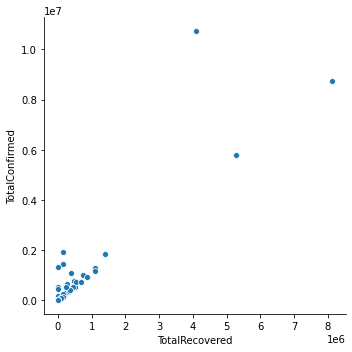

In [23]:
sns.relplot(x="TotalRecovered", y="TotalConfirmed", data=df)

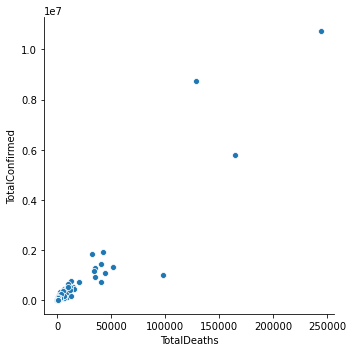

In [24]:
sns.relplot(x="TotalDeaths", y="TotalConfirmed", data=df)

In [29]:
import pycountry_convert as pc 

ModuleNotFoundError: No module named 'pycountry_convert'